## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "None"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2
from keras.layers import Dropout
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1), kernel_regularizer=l1(1e-2))(input_layer)
            x = Dropout(0.2)(x)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1), kernel_regularizer=l1(1e-2))(x)
            x = Dropout(0.2)(x)
            x = BatchNormalization()(x)
            
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256
MOMENTUM = 0.95

In [9]:
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(input_shape=x_train.shape[1:],)
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]
results= {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc': train_acc,
                         'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
__________

50000/50000 [==============================] - 8s 164us/step - loss: 2.3313 - acc: 0.2490 - val_loss: 2.3823 - val_acc: 0.2308
Epoch 47/100
50000/50000 [==============================] - 8s 165us/step - loss: 2.3325 - acc: 0.2492 - val_loss: 2.4956 - val_acc: 0.1860
Epoch 48/100
50000/50000 [==============================] - 8s 162us/step - loss: 2.3324 - acc: 0.2470 - val_loss: 2.3976 - val_acc: 0.2266
Epoch 49/100
50000/50000 [==============================] - 8s 164us/step - loss: 2.3308 - acc: 0.2467 - val_loss: 2.3322 - val_acc: 0.2322
Epoch 50/100
50000/50000 [==============================] - 8s 163us/step - loss: 2.3278 - acc: 0.2469 - val_loss: 2.4387 - val_acc: 0.2038
Epoch 51/100
50000/50000 [==============================] - 8s 160us/step - loss: 2.3243 - acc: 0.2522 - val_loss: 2.4242 - val_acc: 0.2020
Epoch 52/100
50000/50000 [==============================] - 8s 161us/step - loss: 2.3263 - acc: 0.2501 - val_loss: 2.3497 - val_acc: 0.2284
Epoch 53/100
50000/50000 [=======

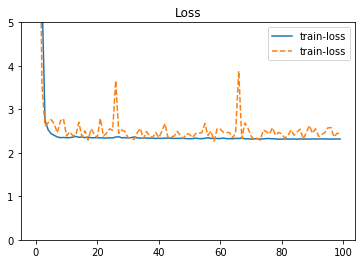

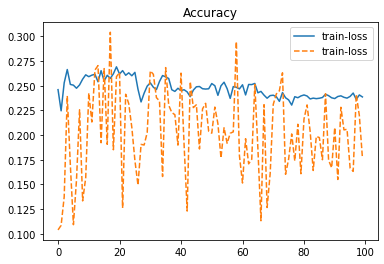

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.plot(range(len(results['train-loss'])),results['train-loss'], '-', label=cond)
plt.plot(range(len(results['valid-loss'])),results['valid-loss'], '--', label=cond)
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()


plt.plot(range(len(results['train-acc'])),results['train-acc'], '-', label=cond)
plt.plot(range(len(results['valid-acc'])),results['valid-acc'], '--', label=cond)
plt.title("Accuracy")
plt.legend()
plt.show()